In [2]:
# !pip install visualkeras
# !pip install ann_visualizer
# !pip install tensorflow


In [23]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from ann_visualizer.visualize import ann_viz
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard

In [24]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, names=columns)

# Preprocess the data
X = df.drop("class", axis=1).values
y = df["class"].values

# Map the class labels to integers
class_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
y = np.array([class_mapping[label] for label in y])

# One-hot encode the class labels
y_one_hot = to_categorical(y)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Create the Keras model
model = Sequential()
model.add(Dense(10, input_dim=4, activation="relu"))
model.add(Dense(10,  activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,  activation="relu"))
model.add(Dense(3, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


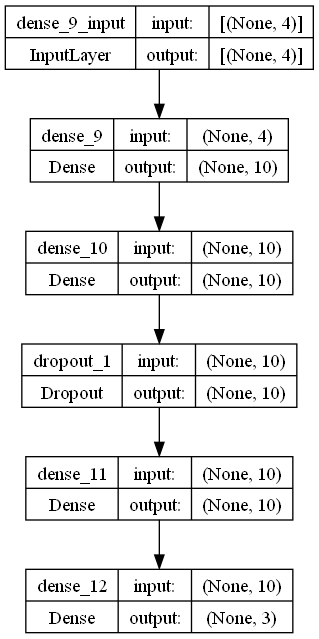

In [29]:
# Visualize the model architecture using visualkeras
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)



In [31]:
# Visualize the model architecture using ann_visualizer
ann_viz(model, title="Iris Dataset Neural Network")



In [32]:
# Set up TensorBoard for training visualization
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1, write_graph=True, write_images=True)
# Train the model with TensorBoard callback
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, callbacks=[tensorboard_callback])
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/10
24/24 [==============================] - 2s 11ms/step - loss: 1.0245 - accuracy: 0.4000
Epoch 2/10
24/24 [==============================] - 0s 11ms/step - loss: 0.9369 - accuracy: 0.5500
Epoch 3/10
24/24 [==============================] - 0s 10ms/step - loss: 0.8718 - accuracy: 0.5417
Epoch 4/10
24/24 [==============================] - 0s 8ms/step - loss: 0.8339 - accuracy: 0.5833
Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 0.7868 - accuracy: 0.6083
Epoch 6/10
24/24 [==============================] - 0s 8ms/step - loss: 0.7541 - accuracy: 0.6000
Epoch 7/10
24/24 [==============================] - 0s 8ms/step - loss: 0.8064 - accuracy: 0.5417
Epoch 8/10
24/24 [==============================] - 0s 16ms/step - loss: 0.7563 - accuracy: 0.5500
Epoch 9/10
24/24 [==============================] - 0s 9ms/step - loss: 0.6554 - accuracy: 0.6250
Epoch 10/10
1/1 [==============================] - 0s 187ms/step - loss: 0.5461 - accuracy: 0.8000
Test accuracy: 

In [34]:
# launch tensorflow
# cntr shift p (launch tensorboard)


^C


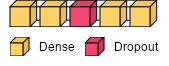

In [36]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model,legend=True, font=font)

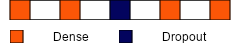

In [40]:
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
#customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False,spacing=30,color_map=color_map)